In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_process import arma_generate_sample
import warnings
warnings.filterwarnings("ignore")

###  Sample Autocovariance Function
#### White Noise

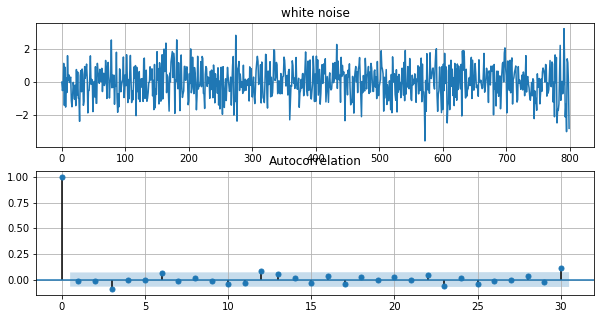

In [40]:
np.random.seed(62)
white_noise = np.random.randn(800)
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(white_noise)
plt.grid()
plt.title("white noise")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(white_noise,ax)

#### Random Walk

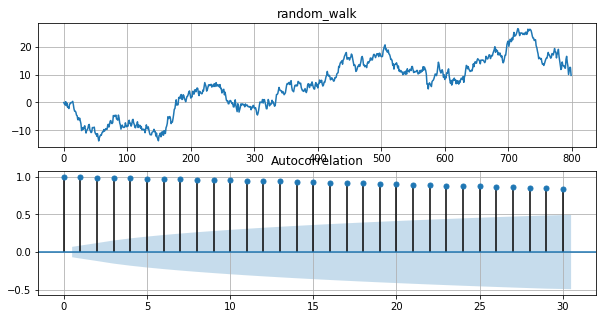

In [41]:
np.random.seed(62)
random_walk = np.random.randn(800).cumsum()
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(random_walk)
plt.grid()
plt.title("random_walk")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(random_walk,ax)

#### MA(1) θ = 0.5

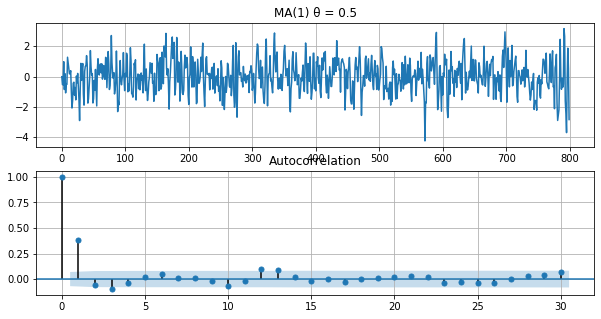

In [51]:
np.random.seed(62)
ma1 = arma_generate_sample(ar=[1],ma=[1,0.5],nsample=800)
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(ma1)
plt.grid()
plt.title("MA(1) θ = 0.5")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(ma1,ax)

#### MA(1) θ = -0.5

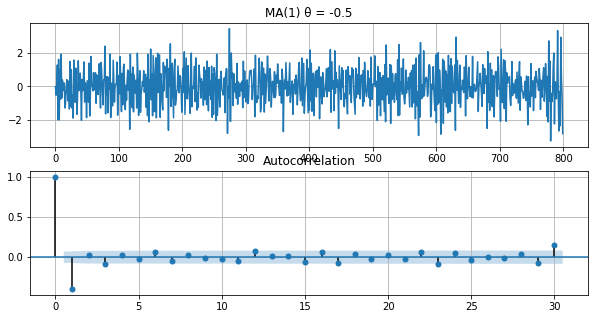

In [55]:
np.random.seed(62)
ma1 = arma_generate_sample(ar=[1],ma=[1,-0.5],nsample=800)
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(ma1)
plt.grid()
plt.title("MA(1) θ = -0.5")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(ma1,ax)

#### AR(1) φ = 0.9

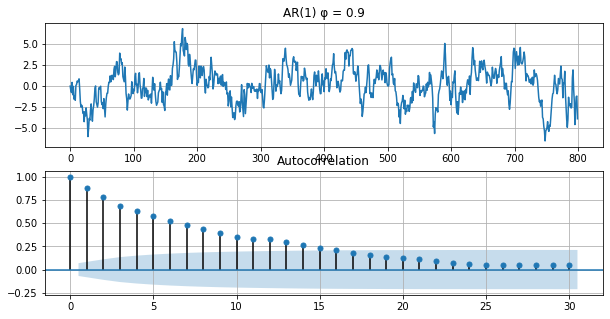

In [57]:
np.random.seed(62)
ar1 = arma_generate_sample(ar=[1,-0.9],ma=[1],nsample=800)
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(ar1)
plt.grid()
plt.title("AR(1) φ = 0.9")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(ar1,ax)

#### AR(1) φ = -0.9

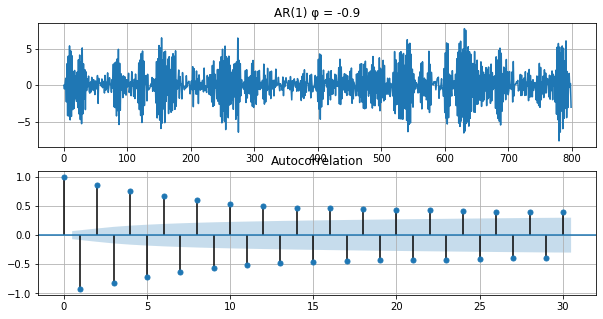

In [58]:
np.random.seed(62)
ar1 = arma_generate_sample(ar=[1,0.9],ma=[1],nsample=800)
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(ar1)
plt.grid()
plt.title("AR(1) φ = -0.9")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(ar1,ax)

#### AR(1) φ = -1

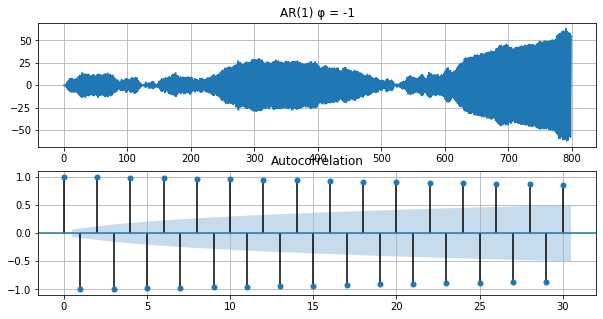

In [70]:
np.random.seed(62)
ar1 = arma_generate_sample(ar=[1,1],ma=[1],nsample=800)
plt.subplots(2,1,figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(ar1)
plt.grid()
plt.title("AR(1) φ = -1")
ax = plt.subplot(2,1,2)
plt.grid()
g = plot_acf(ar1,ax)

### Confidence Intervals for ACF
If we have n number of IID observations { Xt ; t = 1,2,…,n }, for large n and h>1, sample ACF will be Normally distributed with
distribution N(0,1/n)

Simulate 200 steps white noise, repeat 200 times and calculate the distribution of autocorrelation

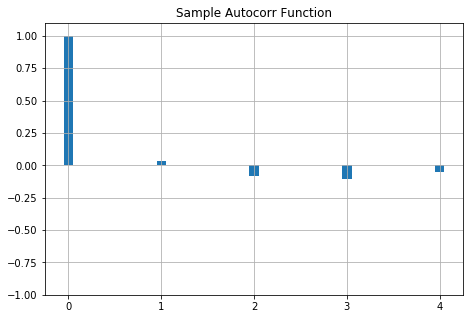

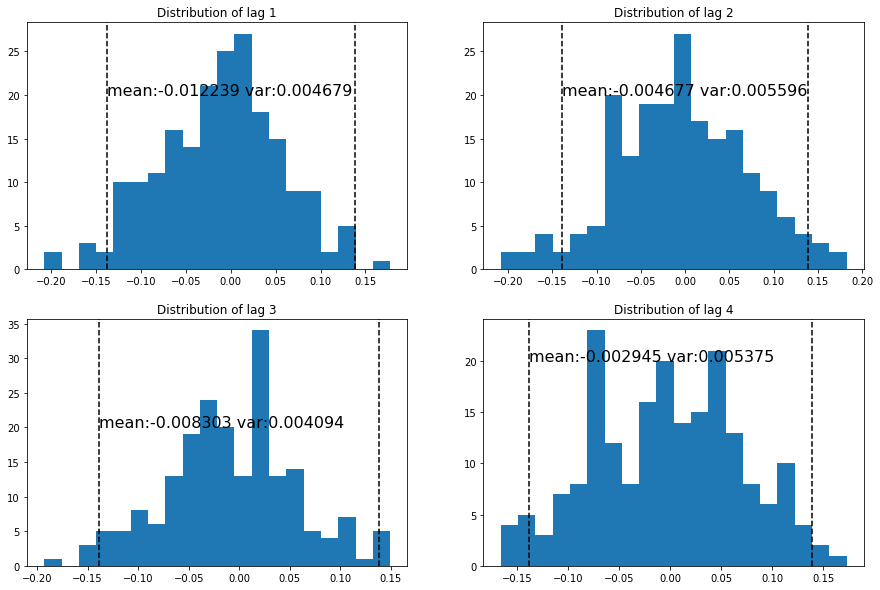

In [61]:
result = pd.DataFrame(columns=["lag0","lag1","lag2","lag3","lag4"])
for _ in range(200):
    white_noise = np.random.randn(200)
    result.loc[len(result)] = acf(white_noise,nlags=4)
plt.subplots(1,1,figsize=(7.5,5))
plt.subplot(1,1,1)
plt.title("Sample Autocorr Function")
plt.bar(x=range(0,5),height=result.loc[0],width=0.1)
plt.ylim((-1, 1.1))
plt.grid()
plt.subplots(2,2,figsize=(15,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.title("Distribution of lag %d"%i)
    plt.hist(result["lag%d"%i],bins=20)
    ci = 1.96/np.sqrt(200)
    plt.axvline(ci,label="1",color='black',linestyle="--")
    plt.axvline(-ci,label="1",color='black',linestyle="--")
    plt.text(-ci,20,"mean:%f var:%f"%(result["lag%d"%i].mean(),result["lag%d"%i].var()),fontdict={'size': 16, 'color': 'black'})